# CSS Trends: Final Project

# Reading Data
Below I have loaded the data into python. I removed columns that I will not be using for analysis. I also deleted rows with missing values in my target variable College GPA. 

In [16]:
#reading data file
import pyreadstat
css, meta = pyreadstat.read_sav('/Users/bryanatividad/Desktop/DATA1030-Fall2022/CSS_TRENDS.sav', apply_value_formats=True)
type(css)
type(meta)

pyreadstat._readstat_parser.metadata_container

In [17]:
#viewing the labels of 163 columns
display(meta.column_names_to_labels)
display(css.isnull().any())

{'YEAR': 'CSS Year',
 'ACERECODE': 'Recoded College I.D.',
 'SUBJID': 'Subject I.D.',
 'INSTTYPE': 'Institutional Type',
 'INSTCONT': 'INSTITUTIONAL CONTROL',
 'HBCU': 'Historically Black College or University',
 'HBCU2': 'Historically Black College or University 2',
 'STRAT': 'CIRP Stratification Cell',
 'COMPGROUP1': 'Comparison Group 1',
 'COMPGROUP2': 'Comparison Group 2',
 'COMPGROUP3': 'Comparison Group 3',
 'OBEREG': 'OBE region code',
 'HERIREG': 'HERI Region',
 'INSTSEX': "Institution's sex",
 'NORMSTAT': 'CSS Graduating Senior Status',
 'SEX': 'Your sex:',
 'GENDERIDENTITY': 'What is your current gender identity?',
 'RACE1': 'White/Caucasian',
 'RACE2': 'African American/Black',
 'RACE3': 'American Indian/Alaska Native',
 'RACE4': 'Asian',
 'RACE5': 'Native Hawaiian/Pacific Islander',
 'RACE6': 'Mexican American/Chicana/o/x',
 'RACE7': 'Puerto Rican',
 'RACE8': 'Other Latina/o/x',
 'RACE9': 'Other',
 'RACE10': 'East Asian (e.g., Chinese, Japanese, Korean, Taiwanese)',
 'RACE1

YEAR            False
ACERECODE       False
SUBJID          False
INSTTYPE        False
INSTCONT        False
                ...  
MOTHEDUC_TFS     True
SCAREER_TFS      True
SCAREERA_TFS     True
VETERAN          True
VETERAN_TFS      True
Length: 163, dtype: bool

In [18]:
#eliminating columns I will not use for analysis
css2 = css[['YEAR','INSTTYPE','HBCU','SEX',\
            'COLLGPA','MAJORGPA','HABITS_OF_MIND',\
            'DISAB5_TFS', 'DISAB01_TFS', 'DISAB02_TFS','DISAB06_TFS',\
            'FAC_INTERACTION','SATIS_COURSES','SATIS_OVERALL',\
            'SENSE_BELONG']]
#viewing data types of columns
display(css2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111329 entries, 0 to 111328
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   YEAR             111329 non-null  float64 
 1   INSTTYPE         111329 non-null  category
 2   HBCU             111329 non-null  category
 3   SEX              108486 non-null  category
 4   COLLGPA          99829 non-null   category
 5   MAJORGPA         98802 non-null   category
 6   HABITS_OF_MIND   93614 non-null   float64 
 7   DISAB5_TFS       20552 non-null   category
 8   DISAB01_TFS      12731 non-null   category
 9   DISAB02_TFS      12755 non-null   category
 10  DISAB06_TFS      12705 non-null   category
 11  FAC_INTERACTION  101058 non-null  float64 
 12  SATIS_COURSES    102984 non-null  float64 
 13  SATIS_OVERALL    104186 non-null  float64 
 14  SENSE_BELONG     102607 non-null  float64 
dtypes: category(9), float64(6)
memory usage: 6.1 MB


None

In [19]:
#viewing which columns have missing data and the percent of missing values
#by columns
import pandas as pd 
perc_missing = css2.isnull().sum()*100/len(css2.index)
miss_v = pd.DataFrame({'Percent_Missing': perc_missing})
miss_v.sort_values('Percent_Missing', ascending=False, inplace=True)
display(miss_v)

,Percent_Missing
DISAB06_TFS,88.587879
DISAB01_TFS,88.564525
DISAB02_TFS,88.542967
DISAB5_TFS,81.539401
HABITS_OF_MIND,15.912296
MAJORGPA,11.252234
COLLGPA,10.329743
FAC_INTERACTION,9.225808
SENSE_BELONG,7.834437
SATIS_COURSES,7.495801


In [20]:
#deleting missing values for target variable College GPA
css3 = css2.dropna(how='any',subset=['COLLGPA','MAJORGPA'])
print("Number of rows before deleting missing values: ", len(css2),\
      "\n""","Number of rows after deleting missing values: ",len(css3))

Number of rows before deleting missing values:  111329 
 Number of rows after deleting missing values:  98332


# Exploratory Data Analysis

In [21]:
#viewing value counts for each variable in dataset
for col in css3.columns:
    if css3[col].dtypes == 'float64':
        count = css3[col].describe().to_frame()
    else:
        count = css3[col].value_counts(normalize=True).to_frame().sort_index()    
    display(count)

,YEAR
count,98332.000000
mean,2012.638917
std,2.825329
min,2009.000000
25%,2010.000000
50%,2012.000000
75%,2014.000000
max,2018.000000


,INSTTYPE
2YR COLLEGE,0.000183
4YR COLLEGE,0.695521
UNIVERSITY,0.304296


,HBCU
NO,0.996583
YES,0.003417


,SEX
Female,0.632230
"Genderqueer, gender non-conforming, other identity",0.000868
Male,0.366902


,COLLGPA
A or A+,0.196976
A-,0.274051
B,0.172914
B+,0.245169
B-,0.067608
C,0.009915
C+,0.032889
D,0.000478


,MAJORGPA
A or A+,0.286529
A-,0.282309
B,0.133507
B+,0.207806
B-,0.056767
C,0.009265
C+,0.023278
D,0.000539


,HABITS_OF_MIND
count,84452.000000
mean,53.054339
std,11.096162
min,4.010000
25%,45.677500
50%,52.650000
75%,60.110000
max,79.080000


,DISAB5_TFS
Marked,0.034672
Not marked,0.965328


,DISAB01_TFS
No,0.964424
Yes,0.035576


,DISAB02_TFS
No,0.952763
Yes,0.047237


,DISAB06_TFS
No,0.938377
Yes,0.061623


,FAC_INTERACTION
count,96991.000000
mean,52.429324
std,9.179217
min,26.650000
25%,46.530000
50%,51.460000
75%,58.470000
max,74.630000


,SATIS_COURSES
count,98088.000000
mean,51.042616
std,9.084456
min,18.980000
25%,44.510000
50%,50.050000
75%,58.257500
max,67.500000


,SATIS_OVERALL
count,98250.000000
mean,52.150385
std,7.941928
min,22.270000
25%,47.780000
50%,51.250000
75%,57.590000
max,67.050000


,SENSE_BELONG
count,97634.000000
mean,51.011192
std,8.944524
min,24.440000
25%,47.610000
50%,50.250000
75%,58.960000
max,65.480000


A-         26948
B+         24108
A or A+    19369
B          17003
B-          6648
C+          3234
C            975
D             47
Name: COLLGPA, dtype: int64

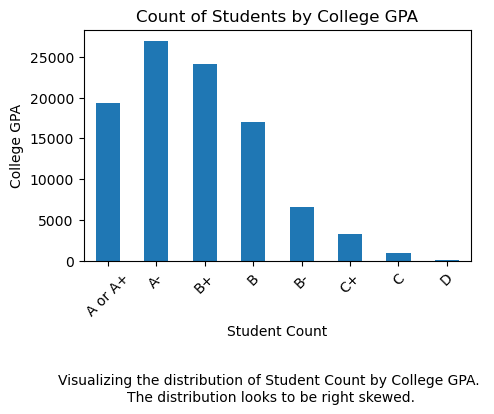

In [22]:
import matplotlib
from matplotlib import pylab as plt
#The ML target variable in this dataset is College GPA, which is categorical
display(css3['COLLGPA'].value_counts())
#visualizing the target variable College GPA by Student Count
GPA_order = ['A or A+','A-','B+','B','B-','C+','C','D']

plt.figure(figsize=(5,3))
pd.value_counts(css3['COLLGPA']).reindex(GPA_order).plot.bar(rot=45)
plt.suptitle(None)
plt.title('Count of Students by College GPA')
plt.ylabel('College GPA')
plt.xlabel('Student Count')
txt = """Visualizing the distribution of Student Count by College GPA. 
The distribution looks to be right skewed."""
plt.figtext(0.5, -.35, txt, wrap=True,\
           horizontalalignment='center',
           fontsize=10)
plt.show()

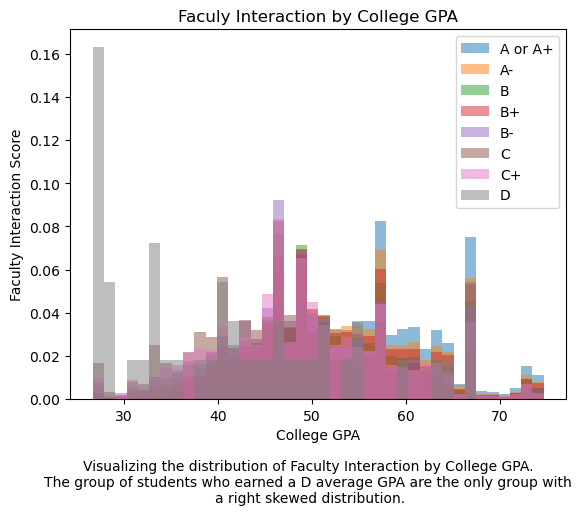

In [23]:
#visualizing faculty interaction by GPA
import matplotlib
from matplotlib import pylab as plt

categories = css3['COLLGPA'].unique().sort_values()
bin_range = (css3['FAC_INTERACTION'].min(),css3['FAC_INTERACTION'].max())

for c in categories:
    plt.hist(css3[css3['COLLGPA']==c]['FAC_INTERACTION'],alpha=0.5,\
             label=c,range=bin_range,bins=40,density=True)
plt.legend()
plt.ylabel('Faculty Interaction Score')
plt.xlabel('College GPA')
plt.title('Faculy Interaction by College GPA')
txt = """Visualizing the distribution of Faculty Interaction by College GPA. 
The group of students who earned a D average GPA are the only group with 
a right skewed distribution."""
plt.figtext(0.5, -.1, txt, wrap=True,\
           horizontalalignment='center',
           fontsize=10)
plt.show()

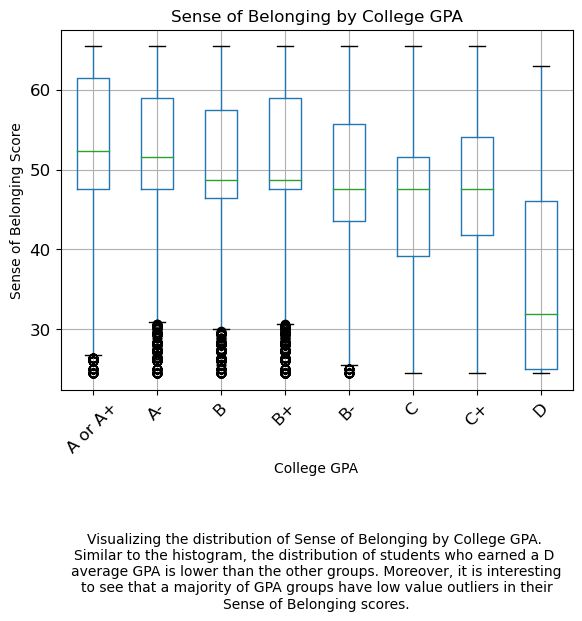

In [24]:
#visualizing Overall Satisfaction by College GPA
css3[['SENSE_BELONG','COLLGPA']].boxplot(by='COLLGPA',rot=45,\
                                         fontsize=12)
plt.suptitle(None)
plt.title('Sense of Belonging by College GPA')
plt.ylabel('Sense of Belonging Score')
plt.xlabel('College GPA')
txt = """Visualizing the distribution of Sense of Belonging by College GPA. 
Similar to the histogram, the distribution of students who earned a D 
average GPA is lower than the other groups. Moreover, it is interesting
to see that a majority of GPA groups have low value outliers in their
Sense of Belonging scores."""
plt.figtext(0.5, -.30, txt, wrap=True,\
           horizontalalignment='center',
           fontsize=10)
plt.show()

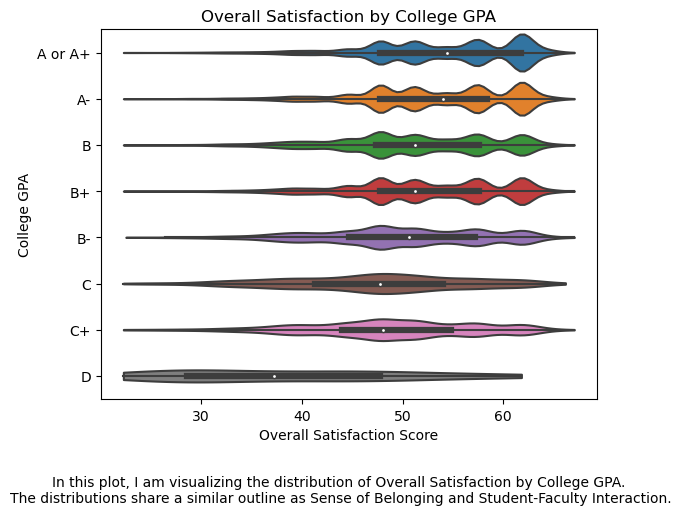

In [26]:
import seaborn as sns
sns.violinplot(data=css3,x='SATIS_OVERALL',y='COLLGPA',\
               cut=0)
plt.suptitle(None)
plt.title('Overall Satisfaction by College GPA')
plt.xlabel('Overall Satisfaction Score')
plt.ylabel('College GPA')
txt = """In this plot, I am visualizing the distribution of Overall Satisfaction by College GPA. 
The distributions share a similar outline as Sense of Belonging and Student-Faculty Interaction."""
plt.figtext(0.5, -.10, txt, wrap=True,\
           horizontalalignment='center',
           fontsize=10)
plt.show()

# Data Preprocessing

In [11]:
#setting target variable: College GPA
y = css3['COLLGPA']
css3.drop(columns=['COLLGPA'],inplace=True)
#unprocessed feature matrix
X = css3.values
print(X.shape)

(98332, 14)


/var/folders/w1/8k46sxfn44s0hbx_zl6wqfgc0000gn/T/ipykernel_5428/4196011224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  css3.drop(columns=['COLLGPA'],inplace=True)


In [12]:
css3.columns.tolist()

['YEAR',
 'INSTTYPE',
 'HBCU',
 'SEX',
 'MAJORGPA',
 'HABITS_OF_MIND',
 'DISAB5_TFS',
 'DISAB01_TFS',
 'DISAB02_TFS',
 'DISAB06_TFS',
 'FAC_INTERACTION',
 'SATIS_COURSES',
 'SATIS_OVERALL',
 'SENSE_BELONG']

In [38]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#splitting the data set into train, validation and test sets
random_state = 42

X_train, X_other, y_train, y_other = train_test_split(css3, y, train_size=0.6, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=random_state)

#encoders per feature
ordinal_ftrs=['YEAR']
ordinal_cats=[['2009.0','2010.0','2011.0','2012.0','2013.0','2014.0',\
               '2016.0','2017.0','2018.0']]
onehot_ftrs = ['INSTTYPE','HBCU','SEX','DISAB5_TFS','DISAB01_TFS','DISAB02_TFS',\
               'DISAB06_TFS']
minmax_ftrs = ['HABITS_OF_MIND','FAC_INTERACTION','SATIS_COURSES',\
               'SATIS_OVERALL','SENSE_BELONG']

#collecting transformers

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])


X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print('validation set:',X_val_prep.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test_prep.shape, y_test.shape) # 20% of points are in test

print(X_train.shape)
print(X_train_prep.shape)

validation set: (19666, 27) (19666,)
test set: (19667, 27) (19667,)
(58999, 15)
(58999, 27)
